#IMPORT LIBRARY

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING DATA

In [2]:
data = pd.read_csv('insurance.csv')


#UNDERSTANDING DATA

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#TUGAS 1: Multiple Linear Regression

##1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
   
##Jawaban

Encode nilai non-numerik menjadi nilai numerik agar bisa diproses


In [4]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Gunakan Visualisasi Heatmap untuk memilih kategori mana yang termasuk variabel bebas dan target

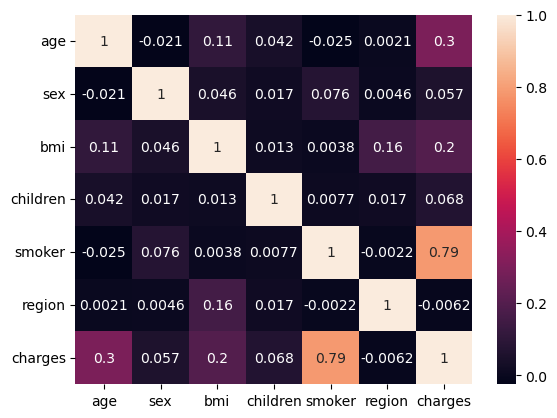

In [5]:
sns.heatmap(data.corr(),annot=True)
plt.show()

Dari hasil heatmap, maka 3 kategori teratas yang mempengaruhi charges adalah 
Age, sex dan smoker. 
Sehingga 3 kategori tersebut adalah variabel bebas, dan charges adalah variabel target.

In [6]:
X = data[['age','bmi','smoker']]
y = data['charges']


##2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##3. Lakukan Scaling jika diperlukan

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#y tidak perlu di scaling karena merupakan target variable 

##4.Buat model multiple linear regression menggunakan Scikit-Learn.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##Menampilkan plot untuk prediksi setiap prediktor

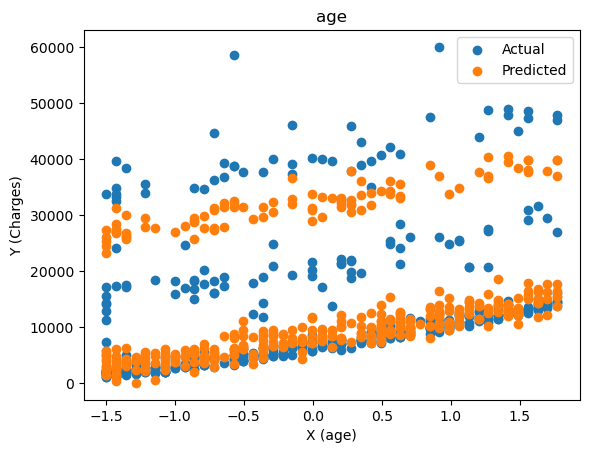

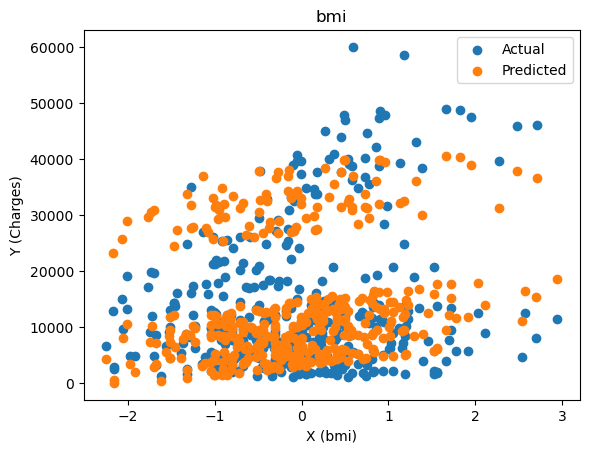

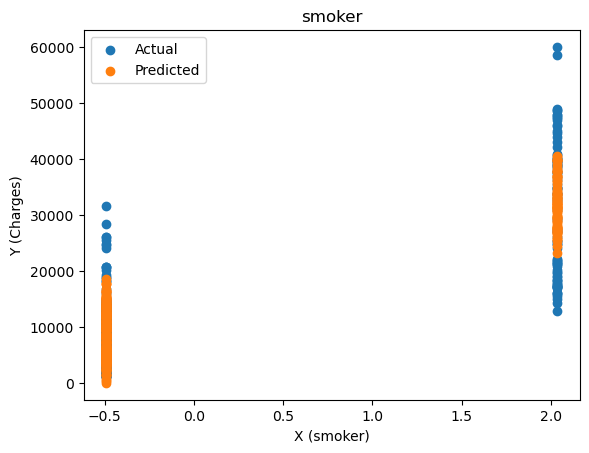

In [10]:


# Daftar prediktor, warna, dan judul
predictors = ['age', 'bmi', 'smoker']

# Scatter plot for 'Smoker'
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], y_pred,  label='Predicted')
plt.title(predictors[0])
plt.xlabel(f"X ({predictors[0]})")
plt.ylabel("Y (Charges)")
plt.legend()
plt.show()

# Scatter plot for 'Age'
plt.scatter(X_test[:, 1], y_test, label='Actual')
plt.scatter(X_test[:, 1], y_pred,  label='Predicted')
plt.title(predictors[1])
plt.xlabel(f"X ({predictors[1]})")
plt.ylabel("Y (Charges)")
plt.legend()
plt.show()

# Scatter plot for 'BMI'
plt.scatter(X_test[:, 2], y_test, label='Actual')
plt.scatter(X_test[:, 2], y_pred,  label='Predicted')
plt.title(predictors[2])
plt.xlabel(f"X ({predictors[2]})")
plt.ylabel("Y (Charges)")
plt.legend()
plt.show()

##Evaluasi Model

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R2:', r2)

MAE: 3934.9473959253505
MSE: 32266086.037517134
R2: 0.7777782410843159
